# Module 2 Long Exam

### Instructions
Given a dataset, provide the desired outputs by showing the appropriate outputs and charts for each of the given tasks. Only the given libraries are to be used for this exam.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Dataset

The given dataset contains accelerometer data of a cooler fan with corresponding weights for the blades within. These weights are generally used to create vibrations that aids to help predicting motor or engine failure in automobiles. 

For more details on the dataset, visit the given link:
https://archive.ics.uci.edu/dataset/846/accelerometer


Research using this dataset:
https://doi.org/10.3390/s19194342

In [2]:
# Optional: Run the given cell below to automatically download
# the dataset needed for the task

!wget https://archive.ics.uci.edu/static/public/846/accelerometer.zip

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [3]:
# Optional: Run the given cell below to automatically extract
# and load the dataset needed for the task

def zip_extract(filename: str, csv_filename: str):
    import zipfile

    with zipfile.ZipFile(filename, 'r') as zip_data:
        zip_data.extract(csv_filename)

zip_extract('accelerometer.zip', 'accelerometer (1).csv')
accel_data = pd.read_csv('accelerometer (1).csv')

In [4]:
accel_data.head()

,wconfid,pctid,x,y,z
0,1,20,1.004,0.090,-0.125
1,1,20,1.004,-0.043,-0.125
2,1,20,0.969,0.090,-0.121
3,1,20,0.973,-0.012,-0.137
4,1,20,1.000,-0.016,-0.121


In [5]:
accel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153000 entries, 0 to 152999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   wconfid  153000 non-null  int64  
 1   pctid    153000 non-null  int64  
 2   x        153000 non-null  float64
 3   y        153000 non-null  float64
 4   z        153000 non-null  float64
dtypes: float64(3), int64(2)
memory usage: 5.8 MB


#### Task 1: From the given sample, show an ECDF curve of one unique group (`wconfid=1` and `pctid=70`) for accelerometer `x` axis along with its 500 bootstrap samples.

Example output:

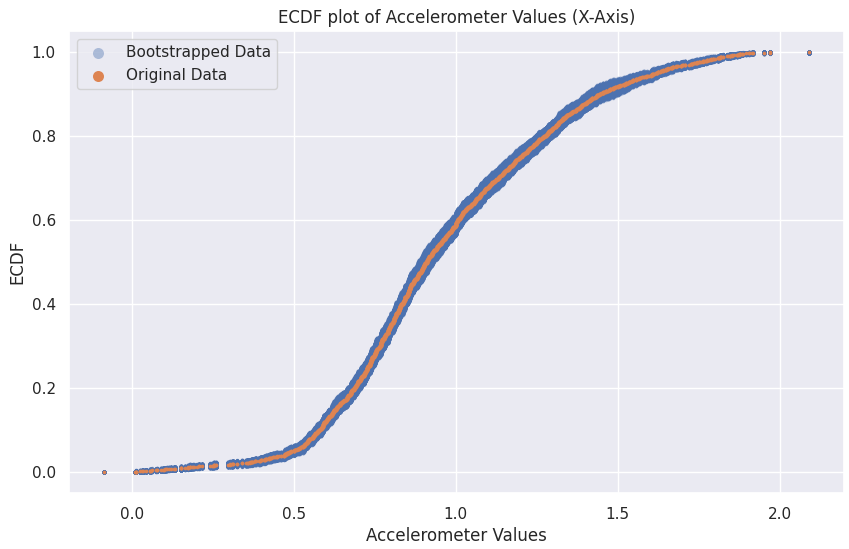


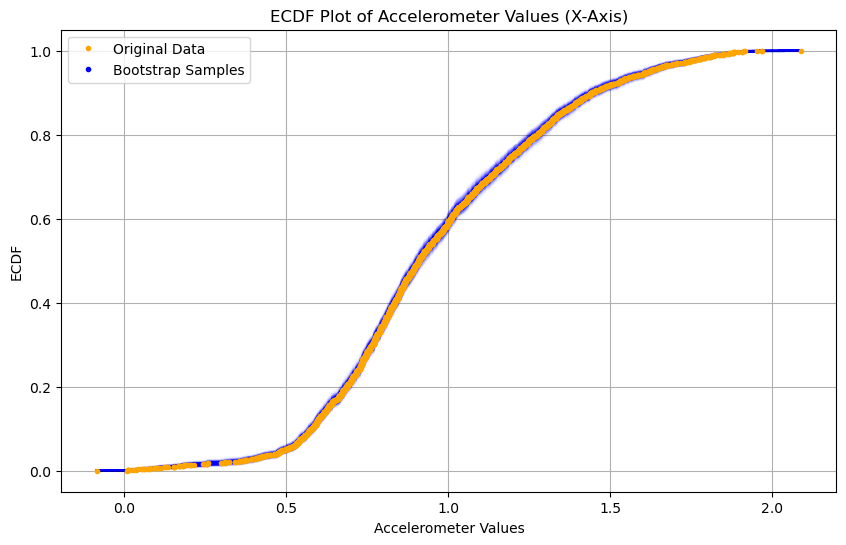

In [6]:
# Enter your code here. You may add additional cells
filtered_data = accel_data[(accel_data['wconfid'] == 1) & (accel_data['pctid'] == 70)]
x_data = filtered_data['x']

def ecdf(data):
    n = len(data)
    x_values = np.sort(data)    
    y_values = np.arange(1, n+1) / n
    return x_values, y_values

x_ecdf, y_ecdf = ecdf(x_data)

plt.figure(figsize=(10, 6))

# Plot Bootstrap Samples first
for _ in range(500):
    bootstrap_sample = np.random.choice(x_data, size=len(x_data))    
    x_bootstrap_ecdf, y_bootstrap_ecdf = ecdf(bootstrap_sample)    
    plt.plot(x_bootstrap_ecdf, y_bootstrap_ecdf, marker=' ', linestyle='-', alpha=0.02, color='blue')
    
# Plot Original Data above Bootstrap Samples
plt.plot(x_ecdf, y_ecdf, marker='.', linestyle='none', label='Original Data', color='orange') 

plt.plot([ ], [ ], '.', color='blue', label='Bootstrap Samples')

plt.xlabel('Accelerometer Values')
plt.ylabel('ECDF')
plt.title('ECDF Plot of Accelerometer Values (X-Axis)')
plt.legend()
plt.grid()
plt.show()

#### Task 2: Show a plot to illustrate whether there difference in any axis (`x`, `y`, or `z`) between two different setups `wconfid=[1,3]` with the same speed `pctid=70`

Example Output:

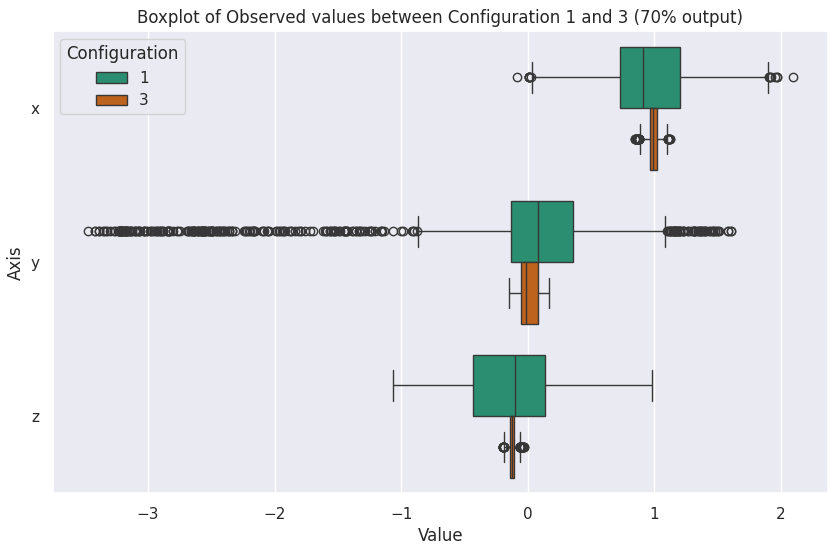

In [7]:
# Enter your code here. You may add additional cells
# Filtering
selected_setups = accel_data[(accel_data['wconfid'].isin([1, 3])) & (accel_data['pctid'] == 70)]

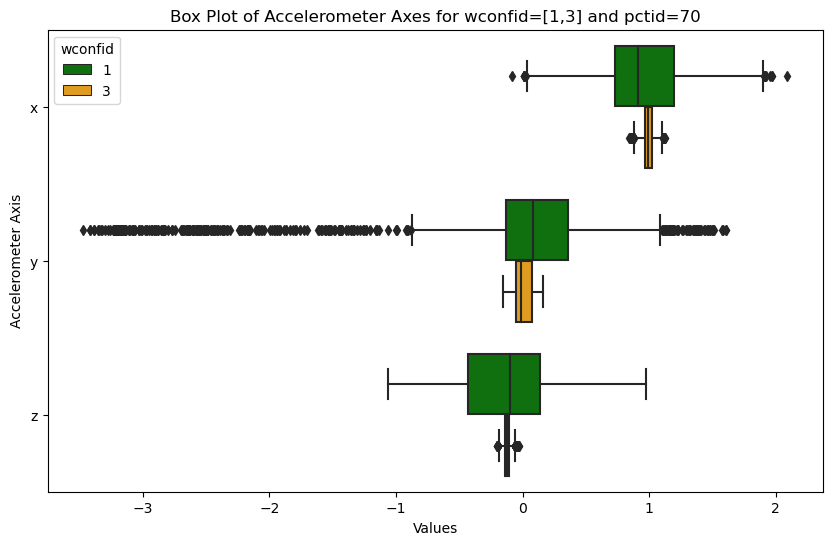

In [8]:
#  Melt the DataFrame for boxplot
melted_data = pd.melt(selected_setups, id_vars=['wconfid', 'pctid'], value_vars=['x', 'y', 'z'], var_name='axis', value_name='value')

# Create a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='value', y='axis', hue='wconfid', data=melted_data, palette={1: 'green', 3: 'orange'})
plt.title('Box Plot of Accelerometer Axes for wconfid=[1,3] and pctid=70')
plt.xlabel('Values')
plt.ylabel('Accelerometer Axis')
plt.legend(title='wconfid')
plt.show()